In [1]:
import cv2
import numpy as np
import copy
from matplotlib import pyplot as plt

def show_image(img, text=None):
    if text:
        plt.title(text)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

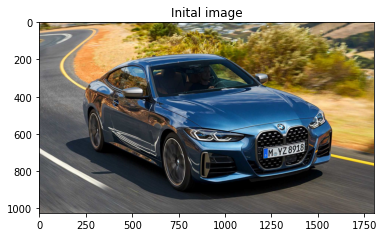

In [2]:
#1 
img = cv2.imread('bmw.jpg')

show_image(img, "Inital image")

In [3]:
#2 
img  = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
y, u, v = cv2.split(img)

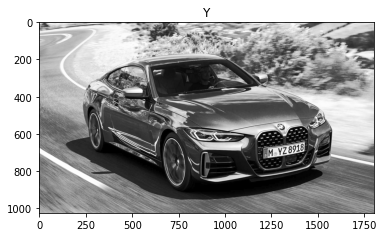

In [4]:
#3 
y = cv2.equalizeHist(y)
show_image(y, "Y")

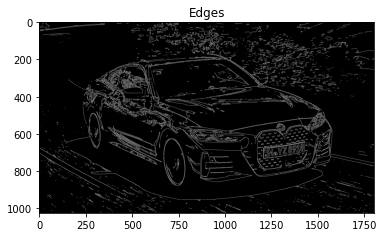

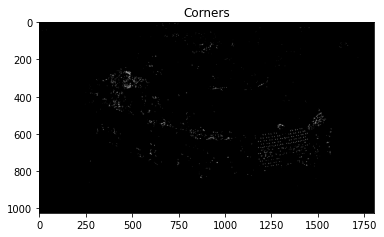

In [31]:
#4 
edges = cv2.Canny(y, 250, 300)

#5
corners = cv2.cornerHarris(y,2,3,0.04)
ret, corners = cv2.threshold(corners,0.01*corners.max(),255,0)

corners = corners.astype('uint8')

show_image(edges, "Edges")
show_image(corners, "Corners")

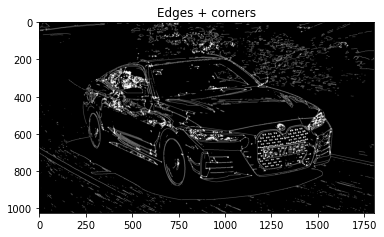

In [32]:
edges_and_corners = edges

for indexes, value in np.ndenumerate(corners):
    if value > 0:
        cv2.circle(edges_and_corners, (indexes[1], indexes[0]), 2, color=(255))

show_image(edges_and_corners, "Edges + corners")

In [33]:
#6
edges_and_corners_inv = cv2.bitwise_not(edges_and_corners)
D = cv2.distanceTransform(edges_and_corners_inv, cv2.DIST_L2, 3)

In [34]:
#8
y_integral = cv2.integral(y)[1:, 1:]
def sum_via_integral_image(i,j, filter_size):
    if filter_size == 0:
        return y[i,j]

    min_i = max(i-filter_size, 0)
    max_i = min(i+filter_size, y_integral.shape[0]-1)

    min_j = max(j-filter_size, 0)
    max_j = min(j+filter_size, y_integral.shape[1]-1)

    sum = y_integral[max_i, max_j]+y_integral[min_i, min_j]
    sum -= y_integral[max_i, min_j]+y_integral[min_i, max_j]
    return sum


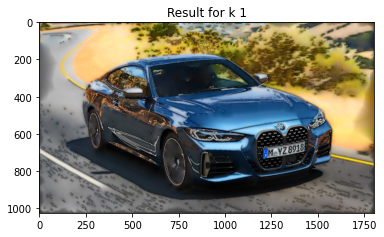

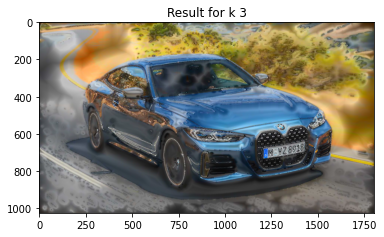

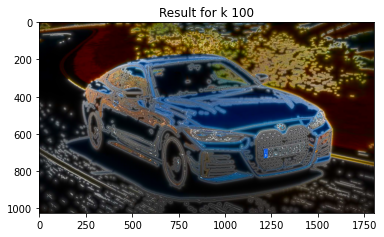

In [35]:
#7
for k in [1, 3, 100]:
    new_y = np.zeros(y.shape).astype('uint8')
    for (i,j), filter_size in np.ndenumerate(D):
        filter = int(np.round(filter_size*k))
        area_size = (filter*2+1)**2
        new_y[i,j] = sum_via_integral_image(i,j, filter)/area_size

    # 9
    img = cv2.merge((new_y,u,v))
    img = cv2.cvtColor(img, cv2.COLOR_YUV2BGR)
    cv2.imwrite(f'processed_k{k}.jpg', img)
    show_image(img, f'Result for k {k}')